<h1> Welcome to the Titanic data analysis - Udacity ITP Nanodegree </h1>

<p> This is the "Investigate a Dataset" project, part of Introduction to Programming Nanodegree. 
In this project, a given dataset (Titanic data from Kaggle.com) will be analyzed using the Python libraries NumPy, Pandas, and Matplotlib.<br>
Before beginning it is already possible to create some questions: 
<ul>
<li>How many exactly survived?</li>
<li>What was the mean age among passengers?</li>
<li>How expensive were the tickets?</li>
<li>It is well known that Titanic was a luxurious ship. But, what was the most 'populated' class?</li>
<li>There was more women or men onboard?</li>
</ul><br>
Without further ado, let's start:
</p>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
import statsmodels.api as sm
%matplotlib inline 

In [2]:
#Load data and check how data looks like
data = '/home/camila/Desktop/Titanic/titanic_data.csv'
df_titanic = pd.read_csv(data)

print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
#Check if any data is missing
print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<p> It looks like a lot of information on age and cabin is missing. There are many ways to deal with missing data. One of the most straight forward methods is to simply replace the missing values with the mean. This method, of course, does not change the mean, but attenuates any correlations involving the variable(s) that are imputed. </p>
<a href= 'https://en.wikipedia.org/wiki/Imputation_(statistics)'> Source</a>

In [4]:
#Let's replace missing age values by the mean:
mean_age = df_titanic['Age'].mean()
df_titanic['Age'] = df_titanic['Age'].fillna(mean_age)
print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#Now, check if any data is duplicated
print(df_titanic.duplicated().any())

False


<h2> Let's now take a look at overall survival rate and more:</h2>

In [6]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p>It is possible to come to some observations:
<ul>
<li>The mean age was around 29 years (with high standard deviation of 14.52).</li>
<li>It looks like some passengers were travelling for free (Fare = 0.0), but, how many? <br>
Curiosity: on average passengers paid £32.20, this would cost £3477.60 in today's money.</li>
<li> From this preliminary numbers, it is hard to say anything about family status, class, etc.</li>
</ul> 
</p>


In [7]:
#How many exactly survived? Answer: 342 people.
print(df_titanic['Survived'].value_counts().reset_index())

   index  Survived
0      0       549
1      1       342


In [8]:
#How many were traveling for free? And how many paid the most? Answer: 15 and 3 people, in this order. 
fare = df_titanic['Fare'].value_counts().reset_index()
fare_sorted = fare.sort_values(by=['index'], ascending=True)
print(fare_sorted.head())
print(fare_sorted.tail())

      index  Fare
9    0.0000    15
180  4.0125     1
192  5.0000     1
200  6.2375     1
187  6.4375     1
        index  Fare
47   227.5250     4
146  247.5208     2
141  262.3750     2
55   263.0000     4
77   512.3292     3


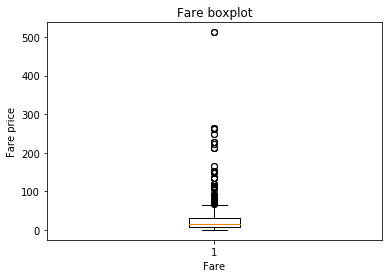

In [9]:
#Let's check how the variable Fare is distributed:

data_fare = df_titanic['Fare']

fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(data_fare)

ax.set_xlabel('Fare')
ax.set_ylabel('Fare price')
ax.set_title('Fare boxplot')

plt.show()

<p>It is easy to see that there is an 'outlier'. </p>

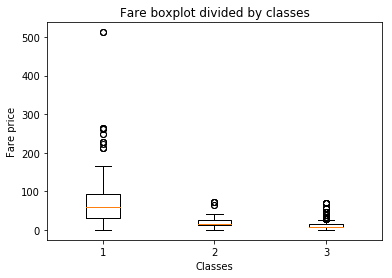

In [10]:
#Continuying, fare prices divided by classes:
first_class = df_titanic.loc[ df_titanic['Pclass'] == 1]
second_class = df_titanic.loc[ df_titanic['Pclass'] ==2]
third_class = df_titanic.loc[ df_titanic['Pclass'] == 3]
data_classes = (first_class['Fare'], second_class['Fare'], third_class['Fare'])

fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(data_classes)

ax.set_xlabel('Classes')
ax.set_ylabel('Fare price')
ax.set_title('Fare boxplot divided by classes')


plt.show()

<p> It looks like some people paid an unfairly expensive ticket price. However, it is not only a matter of "abusive pricing": outliers may mislead our data interpretation.</p>

In [11]:
#So let's deal with the 'fare outlier'... This took me a while to realize, but turns out the 'outlier' is 
#actually more than one cell. So, we have to find a way to determine these cells and eliminate/replace it 
#accordingly. 
max_fare = df_titanic['Fare'].max()
print(max_fare)
max_fare_people = df_titanic.loc[ df_titanic['Fare'] == max_fare]
print (max_fare_people)

512.3292
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


In [12]:
#Delete outlier rows:
df_titanic_wtout_out = df_titanic.drop(df_titanic.index[[258, 679, 737]])
# Deleting rows causes a mess with the indexes, so it is good to reset them. Moreover,
#I created a new variable to store the new shorter dataframe, just in case we need the complete one again.
new_df_titanic = df_titanic_wtout_out.reset_index(drop=True)

In [13]:
#New description of 'Fares' : 
new_df_titanic['Fare'].describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

In [14]:
#Moving to another variable, what was the proportion of women/men?  Answer:314/577
print (df_titanic['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [15]:
#What about the classes? How is this population distributed? 
#Answer: The vast majority was in the third class (491 passengers), followed by the first class (216) and 
#then second class(184).
pclass = df_titanic['Pclass'].value_counts().reset_index()
print (pclass)

   index  Pclass
0      3     491
1      1     216
2      2     184


In [16]:
#Now let's take a look at family status. First, parents and children on board:
parents_children = df_titanic['Parch'].value_counts().reset_index()
siblings = df_titanic['SibSp'].value_counts().reset_index()
print (parents_children)

   index  Parch
0      0    678
1      1    118
2      2     80
3      5      5
4      3      5
5      4      4
6      6      1


In [17]:
#Now, let's check the number of siblings: 
print (siblings)

   index  SibSp
0      0    608
1      1    209
2      2     28
3      4     18
4      3     16
5      8      7
6      5      5


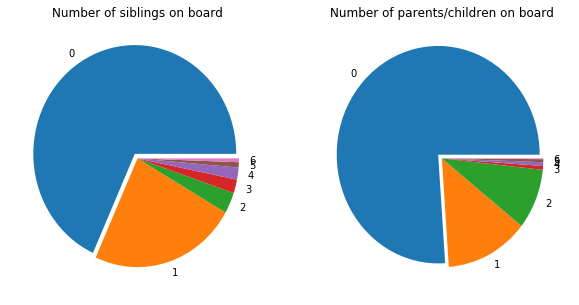

In [20]:
#It looks like most had no kids nor spouses travelling together with them.
#Let's visualize:

explode = (0.05, 0, 0, 0, 0, 0, 0)

fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.pie(siblings['SibSp'], explode=explode, labels=siblings.index)
ax1.set_title('Number of siblings on board')

ax2.pie(parents_children['Parch'], explode=explode, labels=parents_children.index)
ax2.set_title('Number of parents/children on board')

plt.show()

<p> Finally, a comment on the ports because I had no idea what this was all about. Southampton, is a place  on the south coast of England and it was the location of the Titanic’s departure. Cherbourg in France was the first of two stops to pick up passengers. Queenstown on the South Coast of Southern Ireland was the last passenger pick-up of the Titanic. Now here is an interesting piece of information: "at Cherbourg,twenty-four passengers who had booked passage only cross-channel from Southampton left aboard the tenders to be conveyed to shore" and "at Queenstown eight people left the ship and 123 joined for the onward journey". Given these statements, I am not sure about people who survived because they left the ship before she headed to the US. </p> 
<a href = 'https://en.wikipedia.org/wiki/RMS_Titanic'> Source</a>

In [21]:
#About the ports
ports = df_titanic['Embarked'].value_counts().reset_index()
print (ports)

  index  Embarked
0     S       644
1     C       168
2     Q        77


<h2> Now that we know some things about Titanic's population and our dataset, let's take a deeper look into the data itself.</h2> 

<h4> Here are some questions I want to further investigate:</h4> 
<ul> 
<li> What gender had better chances of survival?</li>
<li> Being third class would affect one's chance of survival?</li>
<li> Do the Ports make any difference for the survival outcome? </li>
<li> The women and the Titanic (this is not a question per se, but I was curious to learn more about them).</li>
<li> Last but not least, is it possible to find Jack and Rose among the passangers? </li>
</ul>

In [22]:
#First let's see if there is any correlation between the parametric variables, specially regarding the survival 
#column.
correlation = (df_titanic.corr())
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


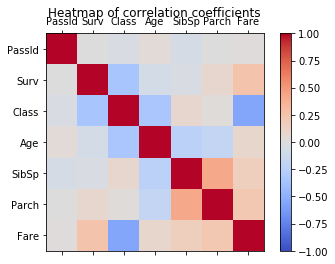

In [23]:
#Correlation matrix may help us visualize
labels = ['PassId', 'Surv', 'Class', 'Age', 'SibSp', 'Parch','Fare']

data_corr = correlation

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data_corr, interpolation='nearest', cmap=cm.coolwarm, vmin= -1, vmax= 1)
fig.colorbar(cax)

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.set_title('Heatmap of correlation coefficients')

plt.show()

<p> As the table and matrix show, there is a weak negative correlation between survival and class. This means that the higher the value of 'class' (i.e. 3 or 2) the lesser chance of survival had the passenger. And of course there is an obvious but yet beautiful negative correlation between fare and class.</p>

<p> For the nominal variables (for example: sex, embarked, cabin, etc), we have to resort to other tests. The Cabin variable looks not so promising because much information is missing. However, the variable 'sex' can be of great value, in order to test if there is some correlation, I will use Fisher's test, the null hypothesis being that there is no difference between men and women.</p>

In [24]:
#Create function to generate 2x2 table, between 2 variables:
def gen_cross_tab( var1, var2):
    cross_tab = pd.crosstab( var1, var2)
    return cross_tab

sex_survive = gen_cross_tab( new_df_titanic.Sex, new_df_titanic.Survived)
print (sex_survive)

Survived    0    1
Sex               
female     81  232
male      468  107


In [25]:
#Now let's do a simple percentage of survival for both genders, just for curiosity.
percent_sex_survive = pd.crosstab(new_df_titanic.Sex, new_df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1)
print (percent_sex_survive)

Survived         0         1
Sex                         
female    0.258786  0.741214
male      0.813913  0.186087


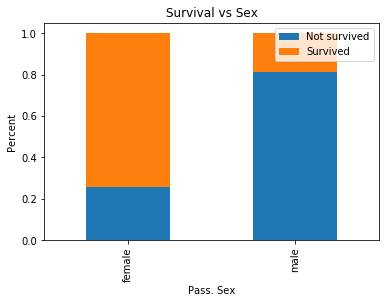

In [26]:
#Bar plot of percentages:
percent_sex_survive.plot(kind='bar', stacked=True)
plt.title('Survival vs Sex')
plt.xlabel('Pass. Sex')
plt.ylabel('Percent')
plt.legend(['Not survived', 'Survived'])
plt.show()

In [27]:
#It is very clear the chances were much better for women. Nonetheless, 
#let's apply the Fisher's exact test to make it even clearer:
oddsratio, pvalue = stats.fisher_exact([[232, 81], [107, 468]]) 
print (oddsratio, pvalue)

12.5275181724 2.50395802426e-60


<p> Conclusion: the null hypothesis is refuted (p < 0.05), women had a better chance of survival (OR = 12.3, this means a woman had 12 times the odds of survival of a men).</p>

In [28]:
#Talking about null hypothesis, let's test if the survived distribution we observed for the variable 'class' 
#is due to chance (null hypothesis). 
#Create crosstab, between 'class' and 'survival':
class_survive = gen_cross_tab(new_df_titanic['Pclass'], new_df_titanic['Survived'])
print(class_survive)

Survived    0    1
Pclass            
1          80  133
2          97   87
3         372  119


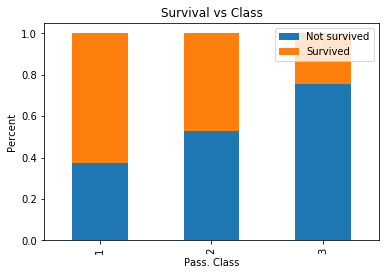

In [29]:
#Bar plot of survival rate (%) divided by classes:
pct_class_survive = pd.crosstab(new_df_titanic.Pclass, new_df_titanic.Survived).apply(lambda r: r/r.sum(), axis=1)
pct_class_survive.plot(kind='bar', stacked=True)
plt.title('Survival vs Class')
plt.xlabel('Pass. Class')
plt.ylabel('Percent')
plt.legend(['Not survived', 'Survived'])
plt.show()

In [30]:
#Chi-square independence test (null hypothesis: the differences are due to chance):
from scipy.stats import chi2_contingency
class_surv_obs = ([[133, 80], [87, 97], [119,372]])
chi2, p, dof, expected = chi2_contingency(class_surv_obs)
print(p)

1.90211338927e-22


<p> Again, the null hypothesis was refuted, and in the Titanic, as a lot of times in life, it was better to be rich in the first class.</p>

In [31]:
#Now let's try the variable 'embarked':
#Create crosstab, between 'Port embarked' and 'survival'
df_embrkd_survive = gen_cross_tab(new_df_titanic['Embarked'], new_df_titanic['Survived'])
print(df_embrkd_survive)

Survived    0    1
Embarked          
C          75   90
Q          47   30
S         427  217


In [32]:
#Chi-squared independence test:
from scipy.stats import chi2_contingency
df_embrkd_survive  = ([[90, 75], [30, 47], [217,427]])
chi2, p, dof, expected = chi2_contingency(df_embrkd_survive)
print (p)

5.40305439754e-06


<p> It looks like again the null hypothesis can be discarded. But, to be very honest, I was not expecting this result, maybe some more analysis is needed? I suspect there could be a confusion factor in play.</p>

In [33]:
#Create table embarked vs class:
embrkd_class = gen_cross_tab(new_df_titanic['Embarked'], new_df_titanic['Pclass'])
print(embrkd_class)

Pclass      1    2    3
Embarked               
C          82   17   66
Q           2    3   72
S         127  164  353


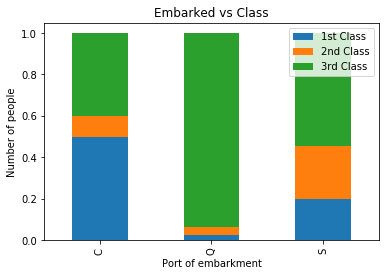

In [34]:
#Plot of class division, by port of embarkment:
pct_embrkd_class = pd.crosstab(new_df_titanic.Embarked,new_df_titanic.Pclass).apply(lambda r: r/r.sum(), axis=1)
pct_embrkd_class.plot(kind='bar', stacked=True)
plt.title('Embarked vs Class')
plt.xlabel('Port of embarkment')
plt.ylabel('Number of people')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

<p> So, there is in fact a distribution difference, that could be responsible for the p we have previously found. Maybe it would be nice to stratificate or create a logistic regression model to check the possibility of this correlation be due to a confounding factor (classes in this case). </p>

In [35]:
#First we have to create dummy variables for the classes, 'get_dummies' does the one hot encoding:
def gen_dummy_var(series):
    dummy_var = pd.get_dummies(series)
    return dummy_var
dummy_class = gen_dummy_var(new_df_titanic['Pclass'])
print(dummy_class.head())

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [36]:
#Then we add the dummy variables to our dataset. The first class will be left out to avoid the so called 
#'dummy variable trap'. Source: https://en.wikipedia.org/wiki/Dummy_variable_(statistics)
# Also, fare and age variables were added to the analysis, just for curiosity.
columns = ['Survived', 'Fare', 'Age']
data = new_df_titanic[columns].join(dummy_class.ix[:,'2':])
print(data.head())

   Survived     Fare   Age  2  3
0         0   7.2500  22.0  0  1
1         1  71.2833  38.0  0  0
2         1   7.9250  26.0  0  1
3         1  53.1000  35.0  0  0
4         0   8.0500  35.0  0  1


In [37]:
#Then repeat the process for the ports:
dummy_emb = gen_dummy_var(new_df_titanic['Embarked'])
print(dummy_emb.head())

   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1


In [38]:
#Due to the 'dummy variable trap', I did not create a function to join the dummy variables to the dataframe.
data = data.join(dummy_emb.ix[:,'Q':])
print(data.head())

   Survived     Fare   Age  2  3  Q  S
0         0   7.2500  22.0  0  1  0  1
1         1  71.2833  38.0  0  0  0  0
2         1   7.9250  26.0  0  1  0  1
3         1  53.1000  35.0  0  0  0  1
4         0   8.0500  35.0  0  1  0  1


In [39]:
#Then,once more, repeat the process for the genders:
dummy_sex = gen_dummy_var(new_df_titanic['Sex'])
print(dummy_sex.head())

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [40]:
data = data.join(dummy_sex.ix[:,'female'])
print(data.head())

   Survived     Fare   Age  2  3  Q  S  female
0         0   7.2500  22.0  0  1  0  1       0
1         1  71.2833  38.0  0  0  0  0       1
2         1   7.9250  26.0  0  1  0  1       1
3         1  53.1000  35.0  0  0  0  1       1
4         0   8.0500  35.0  0  1  0  1       0


In [41]:
#Now the logit part:
train_cols = data.columns[1:]
logit = sm.Logit(new_df_titanic['Survived'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.453725
         Iterations 6


In [42]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  888
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Jul 2017   Pseudo R-squ.:                  0.3176
Time:                        19:08:41   Log-Likelihood:                -402.91
converged:                       True   LL-Null:                       -590.45
                                        LLR p-value:                 6.349e-78
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Fare           0.0023      0.002      0.979      0.328        -0.002     0.007
Age           -0.0162      0.005     -3.103      0.002        -0.026    -0.006
2             -0.5295      0.254     -2.083      0.0

In [43]:
#It is easier to assess the OR:
print(np.exp(result.params))

Fare       1.002332
Age        0.983938
2          0.588920
3          0.175828
Q          1.237797
S          0.785514
female    13.756175
dtype: float64


<h3> From these results we can conclude:</h3>
<p>
<ul>
<li> Once more, the variable age did not affect the survival odds.</li>
<li> As expected, passengers of the second and third classes had worst chances of survival. Specially people in the third class: first class passengers had 6 times more their chances of survival.  </li>
<li> As seen before, women had better chances of survival (OR = 12-13).</li>
<li> And finally, regarding the ports, even though the ports OR's indicates different odds of survival, the confidence intervals for Q and S show us that these findings are <b> not </b> statistically significant (contain 'zero'), and should therefore be disregarded.</li>
</ul>
</p>

<h2> The women and the Titanic</h2>
<p> As we have previously learned, the chances of survival were much higher for women. What else can we learn about them? </p>

In [44]:
# Split the dataframe, selecting only women:
female_titanic = new_df_titanic.loc[new_df_titanic['Sex'] == 'female']
female_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,431.578275,0.741214,2.162939,28.195058,0.696486,0.651757,42.985091
std,257.072600,0.438669,0.856143,12.892427,1.157703,1.023821,51.679053
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.000000,0.000000,1.000000,21.000000,0.000000,0.000000,12.000000
50%,416.000000,1.000000,2.000000,29.699118,0.000000,0.000000,23.000000
75%,642.000000,1.000000,3.000000,35.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,263.000000


 <p>As we can see, the mean age is not far from the original mean (28 y.), the oldest was 96 y.o. and the youngest less than 1 y.o. </p>

<p> From our previous results we know that women and first class passengers had a better chance of survival.
Let's see how the women in the different classes survived:</p>


In [45]:
#Let's see how the women in the different classes survived:
fem_class_survive = gen_cross_tab(female_titanic.Pclass,female_titanic.Survived)
print(fem_class_survive)

Survived   0   1
Pclass          
1          3  90
2          6  70
3         72  72


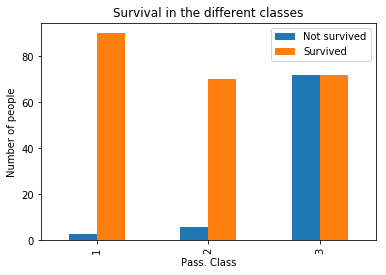

In [46]:
#Clearly the survival rate was much better for the first class. In the bar plot this should be even
#easier to spot:
fem_class_survive.plot(kind='bar')
plt.title('Survival in the different classes')
plt.xlabel('Pass. Class')
plt.ylabel('Number of people')
plt.legend(['Not survived', 'Survived'])
plt.show()

<p> Clearly the first and second classes were better off.</p>

<p> Maybe it is possible to estimate how many women were married, by filtering their titles in the name cells. I got this idea from Kunal Jain's excellent <a href = 'https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/ '>  website</a>
</p>

In [47]:
#Create function to extract the first names:
def name_extractor(name):
    last, first = name.split(',')
    first_splited = first.split('.')
    return first_splited[0]

In [48]:
#Apply function:
salutations = new_df_titanic['Name'].apply(name_extractor)
salutations.value_counts()

 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Lady              1
 Capt              1
 Ms                1
 Mme               1
 Sir               1
 the Countess      1
 Jonkheer          1
 Don               1
Name: Name, dtype: int64

<p> There was a Countess in the Titanic! Quick Google search reveals she could be the <a href= 'https://en.wikipedia.org/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes'> Countess of Rothes.</a> Now, adding all the 'Mrs', 'Ms', 'Mme', it would return aproximately the number of married women (127 in total). Considering it was 1912, I am not expecting any of the 'Dr' to be a woman, sadly.</p>

<h2> Finding Jack and Rose </h2>

<p> We know: 
<ul>
<li>Rose DeWitt Bukater, first class, female, 17y.o., Southampton port</li>
<li>Jack Dawson, third class, male</li>
<a href = 'https://en.wikipedia.org/wiki/Titanic_(1997_film)'> Source</a>
</ul>
</p>  

In [49]:
#No luck searching for names
print(df_titanic[df_titanic.Name == 'Rose DeWitt Bukater'])
print(df_titanic[df_titanic.Name == 'Jack Dawson'])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [50]:
#Maybe James Cameron was protecting their identities, let's try profiles:
seventeen = female_titanic[female_titanic.Age == 17.0]
first_class = seventeen[seventeen.Pclass == 1]
southhampton = first_class[first_class.Embarked == "S"]
print(southhampton)

     PassengerId  Survived  Pclass                                       Name  \
778          782         1       1  Dick, Mrs. Albert Adrian (Vera Gillespie)   

        Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
778  female  17.0      1      0  17474  57.0   B20        S  


In [51]:
#Interesting, it looks like our Rose is married. Let's try Jack:
men = df_titanic[df_titanic.Sex == "male"]
third_class = men[men.Pclass == 1]
print(len(third_class.index))
#... And we have 122 candidates for Jack! 

122


<p> <b>Conclusion:</b> no Rose nor Jack were found :( </p>


<h2> Last words</h2>

<h4> Finally, here are the answers for the afore mentioned questions:</h4> 
<ul> 
<li> What gender had better chances of survival?
<br> Answer: female.</li>
<li> Being third class would affect one's chance of survival?
<br> Answer: Yes, and for worst.</li>
<li> Do the Ports make any difference for the survival outcome? 
<br> Answer: No, if confounding factors are excluded.</li>
<li> The women and the Titanic.
<br> Answer: Despite the better chances of survival when compared to men, women from the third class had diminished chances of survival, compared to first and second class. Also, female majority was single, and there was even one Countess among the feminine passengers!</li>
<li> Last but not least, is it possible to find Jack and Rose among the passangers?
<br> Answer: No :( </li>
</ul>

<h3>Disclaimer: please note that 'correlation is not causation', and data and its analysis are subject to a variety of biases. For example, we do not know how this dataset was gathered, we do not know if people survived because they left the ship (as mentioned previously) and during the analysis, all tests have its limitations and by, for example, filling some missing data, I could  have incurred in systematic bias. </h3> 

<p> Sources:
<ol>
<li> <a href = 'https://en.wikipedia.org/wiki/RMS_Titanic'> Ports</a></li> 
<li><a href= 'https://en.wikipedia.org/wiki/Imputation_(statistics)'> Imputation</a></li> 
<li> <a href = 'https://en.wikipedia.org/wiki/Dummy_variable_(statistics)'> Dummy variable trap</a></li> 
<li> <a href = 'https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/'> Kunal Jain's website </a></li>
<li> <a href= 'https://en.wikipedia.org/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes'> Countess of Rothes</a></li>
<li> <a href = 'https://en.wikipedia.org/wiki/Titanic_(1997_film)'> Jack and Rose</a></li>
</ol></p>